In [1]:
# Import
import os, torch
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from google.colab import drive
from keras.datasets import cifar10
from tensorflow.keras import regularizers, initializers, optimizers, metrics, utils
from tensorflow.keras.applications import resnet50
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input, Add, AveragePooling2D, BatchNormalization, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set Direction
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/data/HW7')

Mounted at /content/gdrive


In [3]:
# Load Dataset
file = np.load('RGB2NDVI_data.npz')
train_x = file['train_x']
train_y = file['train_y']
val_x = file['val_x']
val_y = file['val_y']
val_data = (val_x, val_y)

print(train_x.shape)
print(train_y.shape)

(1315, 320, 320, 3)
(1315, 320, 320, 1)


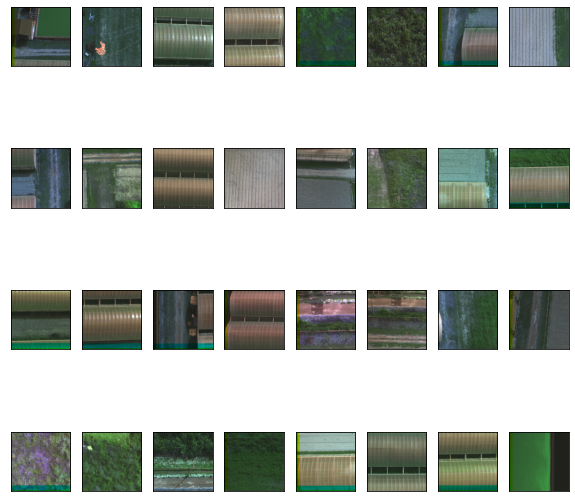

In [4]:
# Show the Downloaded Image
def plot_image(image, cnt_start):
  fig, ax = plt.subplots(4, 8, figsize=(10, 10))
  for i in range(32):
    ax = plt.subplot(4, 8, 1+i)
    ax.imshow(image[cnt_start+i])
    ax.set_xticks([])
    ax.set_yticks([])
  plt.show()
  
plot_image(train_x, 0)
#plot_image(train_y, 0)

In [5]:
'''
# Build Model
input_img = Input(shape=(320, 320, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = BatchNormalization()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model Maps
autoencoder = Model(input_img, decoded)
autoencoder.summary()
'''
print()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 320, 320, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 320, 320, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 320, 320, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 320, 320, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 320, 320, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 320, 320, 32)      9248  

In [16]:

# Build a ResNet
def identity_block(X, filters):
    # Retrieve Filters
    F1, F2, F3 = filters
    # Save the Input Value
    X_shortcut = X

    # First Component of Main Path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second Component of Main Path
    X = Conv2D(filters=F2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Third Component of Main Path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)

    # Final Step: Add Shortcut Value to Main Path, and Pass It Through a RELU Activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def convolutional_block_down_sampling(X, filters):
    # Retrieve Filters
    F1, F2, F3 = filters
    # Save the Input Value
    X_shortcut = X

    ##### MAIN PATH #####
    # First Component of Main Path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(2, 2), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second Component of Main Path
    X = Conv2D(filters=F2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Third Component of Main Path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)

    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(2, 2), padding='same')(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)

    # Final Step: Add Shortcut Value to Main Path, and Pass It Through a RELU Activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

def convolutional_block_up_sampling(X, filters):
    # Retrieve Filters
    F1, F2, F3 = filters
    # Save the Input Value
    X_shortcut = X

    ##### MAIN PATH #####
    # First Component of Main Path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Second Component of Main Path
    X = Conv2D(filters=F2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Third Component of Main Path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='same')(X)
    X = BatchNormalization()(X)
    X = UpSampling2D((2, 2))(X)

    ##### SHORTCUT PATH ####
    X_shortcut = UpSampling2D((2, 2))(X_shortcut)

    # Final Step: Add Shortcut Value to Main Path, and Pass It Through a RELU Activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

def ResidualNetwork(input_shape):
    # Define the Input As a Tensor with Shape Input_Shape
    X_input = Input(input_shape)

    #  Encode Stage 1
    X = Conv2D(64, (3, 3), padding='same')(X_input)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)

    # Encode Stage 2
    X = identity_block(X, [16, 16, 64])
    X = identity_block(X, [16, 16, 64])

    # Encode Stage 3
    X = convolutional_block_down_sampling(X, filters=[32, 32, 128])
    X = identity_block(X, [32, 32, 128])
    X = identity_block(X, [32, 32, 128])

    # Encode Stage 4
    X = convolutional_block_down_sampling(X, filters=[64, 64, 256])
    X = identity_block(X, [64, 64, 256])
    X = identity_block(X, [64, 64, 256])

    # Encode Stage 5
    X = convolutional_block_down_sampling(X, filters=[128, 128, 512])
    X = identity_block(X, [128, 128, 512])
    
    # Encode Stage 6
    X = convolutional_block_down_sampling(X, filters=[256, 256, 1024])
    X = identity_block(X, [256, 256, 1024])

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    # Decode Stage 1
    X = identity_block(X, [256, 256, 1024])
    X = convolutional_block_up_sampling(X, filters=[256, 256, 1024])
    
    # Decode Stage 2
    X = identity_block(X, [256, 256, 1024])
    X = convolutional_block_up_sampling(X, filters=[256, 256, 1024])

    # Decode Stage 3
    X = identity_block(X, [256, 256, 1024])
    X = convolutional_block_up_sampling(X, filters=[256, 256, 1024])

    # Decode Stage 4
    X = identity_block(X, [256, 256, 1024])
    X = convolutional_block_up_sampling(X, filters=[256, 256, 1024])

    # Decode Stage 5
    X = identity_block(X, [256, 256, 1024])
    X = convolutional_block_up_sampling(X, filters=[256, 256, 1024])

    # Up Sampling
    X = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(X)

    # Create Model
    ResNet_model = Model(inputs=X_input, outputs=X)
    
    return ResNet_model

ResNet = ResidualNetwork(input_shape = (320, 320, 3))

# Summary
ResNet.summary()

print()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 320, 320, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_32 (BatchN  (None, 320, 320, 64  256        ['conv2d_33[0][0]']              
 ormalization)                  )                                                           

In [7]:
# Learning Rate Scheduler
def scheduler(epoch, lr):
    if epoch < 35:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)  

In [8]:
'''
# Train Model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
datagen = ImageDataGenerator()
datagen.fit(train_x)
train_flow = datagen.flow(train_x, train_y, batch_size=32)
train_history = autoencoder.fit(train_flow, epochs=50, shuffle=True, validation_data=(val_x, val_y), callbacks=[callback], verbose=1)
'''

# Train Model
ResNet.compile(optimizer='adam', loss='binary_crossentropy')
datagen = ImageDataGenerator()
datagen.fit(train_x)
train_flow = datagen.flow(train_x, train_y, batch_size=32)
train_history = ResNet.fit(train_flow, epochs=50, shuffle=True, validation_data=(val_x, val_y), callbacks=[callback], verbose=1)


Epoch 1/50
42/42 [==============================] - 43s 681ms/step - loss: 0.7124 - val_loss: 0.6969 - lr: 0.0010
Epoch 2/50
42/42 [==============================] - 25s 599ms/step - loss: 0.6657 - val_loss: 0.6957 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 26s 608ms/step - loss: 0.6574 - val_loss: 0.6991 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 26s 615ms/step - loss: 0.6530 - val_loss: 0.6979 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 26s 623ms/step - loss: 0.6492 - val_loss: 0.7026 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 26s 629ms/step - loss: 0.6462 - val_loss: 0.7217 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 27s 635ms/step - loss: 0.6461 - val_loss: 0.7177 - lr: 0.0010
Epoch 8/50
42/42 [==============================] - 27s 639ms/step - loss: 0.6456 - val_loss: 0.7164 - lr: 0.0010
Epoch 9/50
42/42 [==============================] - 27s 643ms/step - loss: 0.6444 - val_

"\n# Train Model\nResNet.compile(optimizer='adam', loss='binary_crossentropy')\ndatagen = ImageDataGenerator()\ndatagen.fit(train_x)\ntrain_flow = datagen.flow(train_x, train_y, batch_size=32)\ntrain_history = ResNet.fit(train_flow, epochs=50, shuffle=True, validation_data=(val_x, val_y), callbacks=[callback], verbose=1)\n"

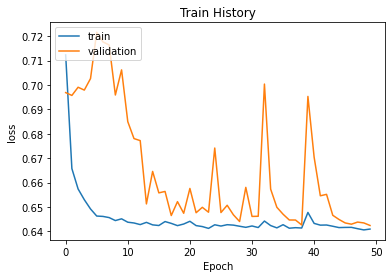

In [9]:
# Show Train History
def show_train_history(train_history, train, validation, filename):  
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')  
    plt.xlabel('Epoch') 
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.savefig(filename)
    plt.show()

#show_train_history(train_history, 'accuracy', 'val_accuracy', './picture/train_history_accuracy.png')
show_train_history(train_history, 'loss', 'val_loss', './picture/train_history_loss.png')

In [10]:
# Save Model
#autoencoder.save('./model_autoencoder.h5') 
ResNet.save('./model_autoencoder.h5') 

In [11]:
# Load Model
autoencoder = load_model('./model_autoencoder.h5')

In [15]:
# Score
scores = autoencoder.evaluate(val_x, val_y)
print()
#print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))
print("\t[Info]   Loss   of testing data = {:0.4f}".format(scores))

11/11 [==============================] - 2s 132ms/step - loss: 0.6424

	[Info]   Loss   of testing data = 0.6424
